In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as ss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [4]:
from sklearn.compose import make_column_selector as selector

In [5]:
from sklearn.feature_selection import chi2

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [7]:
df3 = pd.read_csv('./SBAnational_final.CSV', index_col='LoanNr_ChkDgt')

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  int64  
 5   NoEmp          235206 non-null  int64  
 6   NewExist       235206 non-null  int64  
 7   FranchiseCode  235206 non-null  int64  
 8   UrbanRural     235206 non-null  int64  
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  int64  
dtypes: float64(1), int64(9), object(6)
memory usage: 30.5+ MB


In [9]:
df3['UrbanRural'] = df3['UrbanRural'].astype(str)
df3['NAICS'] = df3['NAICS'].astype(str)
df3['NoEmp'] = df3['NoEmp'].astype(str)
df3['NewExist'] = df3['NewExist'].astype(str)
df3['FranchiseCode'] = df3['FranchiseCode'].astype(str)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  object 
 5   NoEmp          235206 non-null  object 
 6   NewExist       235206 non-null  object 
 7   FranchiseCode  235206 non-null  object 
 8   UrbanRural     235206 non-null  object 
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 30.5+ MB


In [11]:
columns_to_encode = ['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
columns_to_scale  = ['Term', 'CreateJob', 'RetainedJob', 'GrAppv']
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)
scaled_columns  = scaler.fit_transform(df3[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df3[columns_to_encode])

In [12]:
encoded_columns.shape

(235206, 23464)

In [13]:
test2= SelectKBest(chi2, k=1000)
fit3= test2.fit(encoded_columns, df3['MIS_Status'])
features2=fit3.transform(encoded_columns)
scores = pd.DataFrame(fit3.scores_)

In [14]:
features2.shape

(235206, 1000)

In [15]:
import numpy as np
processed_data = np.concatenate([scaled_columns, features2], axis=1)

In [16]:
print(pd.DataFrame(processed_data).head(1))

   0     1     2         3     4     5     6     7     8     9     ...  994   \
0   0.4   0.0   0.0  0.243615   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   995   996   997   998   999   1000  1001  1002  1003  
0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  

[1 rows x 1004 columns]


1- Logistic regression with cross validation on dataset
2- accuracy, F1 score, Precision and recall
4- split, train and test
5- accuracy, F1 score, Precision, Recall and ROC Curve 

# Logistic regression model with cross validation , accuracy result 

In [17]:
logreg=LogisticRegression(max_iter=1000)
from scipy import sparse
cv_results = cross_validate(logreg, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
predicted = cross_val_predict(logreg, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)

In [19]:
predicted[:6]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
cv_results

{'fit_time': array([ 8.98226523,  9.73208928,  9.01350617, 11.10679221,  9.74770904]),
 'score_time': array([0.        , 0.        , 0.        , 0.01562834, 0.        ]),
 'test_score': array([0.82715446, 0.81939159, 0.80100338, 0.74853851, 0.78206246])}

In [21]:
scores2 = cross_val_score(logreg, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)  

In [22]:
scores2

array([0.82715446, 0.81939159, 0.80100338, 0.74853851, 0.78206246])

In [23]:
F1= cross_val_score(logreg, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='f1_macro')  

In [24]:
F1

array([0.82703096, 0.81932736, 0.80100204, 0.74730697, 0.78199044])

In [25]:
accuracy2 = cross_val_score(logreg, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='accuracy') 

In [26]:
accuracy2

array([0.82715446, 0.81939159, 0.80100338, 0.74853851, 0.78206246])

In [27]:
aucs2 = cross_val_score(logreg, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='roc_auc') 

In [28]:
aucs2

array([0.88104925, 0.87381472, 0.86610086, 0.80411383, 0.83993005])

In [29]:
lr_aucs_avg= round(aucs2.mean(),3)
lr_aucs_avg

0.853

In [30]:
cm2= confusion_matrix(df3['MIS_Status'], predicted)

In [31]:
cm2

array([[94627, 22976],
       [25093, 92510]], dtype=int64)

In [32]:
type2_error = cm2[1][0]/ (cm2[1][0] + cm2[1][1])
type2_error

0.21337040721750294

In [33]:
avgscores2= round(scores2.mean(),3)

In [34]:
avgscores2

0.796

In [35]:
from sklearn.metrics import precision_score

In [36]:
precision2= precision_score(df3['MIS_Status'],predicted,average='macro')

In [37]:
precision2

0.7957260419698218

In [38]:
precision3= round(precision_score(df3['MIS_Status'], predicted),3)

In [39]:
precision3

0.801

In [40]:
precision4= precision_score(df3['MIS_Status'], predicted,average='micro')
precision4

0.7956302135149613

In [41]:
precision5= precision_score(df3['MIS_Status'], predicted,average='weighted')
precision5

0.7957260419698217

In [42]:
from sklearn.metrics import recall_score
recall3= round(recall_score(df3['MIS_Status'], predicted),3)
recall3

0.787

In [43]:
recall2= recall_score(df3['MIS_Status'],predicted,average='macro')
recall2

0.7956302135149613

In [44]:
recall4= recall_score(df3['MIS_Status'], predicted,average='micro')
recall4

0.7956302135149613

In [45]:
recall5= recall_score(df3['MIS_Status'], predicted,average='weighted')
recall5

0.7956302135149613

In [46]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(df3['MIS_Status'], predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.79040261 0.80104948]
recall: [0.80463083 0.78662959]
fscore: [0.79745326 0.79377405]
support: [117603 117603]


# Splitting data , Logistic regression model , accuracy, precision, recall, ROC 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, df3['MIS_Status'], test_size=0.3, random_state=0)

In [48]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [50]:
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[28412  6828]
 [ 6613 28709]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     35240
           1       0.81      0.81      0.81     35322

    accuracy                           0.81     70562
   macro avg       0.81      0.81      0.81     70562
weighted avg       0.81      0.81      0.81     70562



In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
lr_probs= logreg.predict_proba(X_test)

In [53]:
lr_probs.shape

(70562, 2)

In [54]:
lr_probs1= lr_probs[:, 1]

In [55]:
lr_probs1.shape

(70562,)

In [56]:
lr_probs1[:6]

array([0.02052632, 0.49221679, 0.08671384, 0.99090643, 0.04850606,
       0.61791914])

In [57]:
from collections import Counter
Counter(y_test)

Counter({0: 35240, 1: 35322})

In [58]:
y_test.shape

(70562,)

In [59]:
y_test.head(10)

LoanNr_ChkDgt
3350033001    0
2130975008    0
8623763007    0
1500775000    1
8880603006    0
1579114007    0
1339613009    1
5771824006    0
2863456009    1
6659154000    1
Name: MIS_Status, dtype: int64

In [60]:
y_test[:6]

LoanNr_ChkDgt
3350033001    0
2130975008    0
8623763007    0
1500775000    1
8880603006    0
1579114007    0
Name: MIS_Status, dtype: int64

In [61]:
y_pred.shape

(70562,)

In [62]:
y_pred[:6]

array([0, 0, 0, 1, 0, 1], dtype=int64)

In [63]:
b = np.array(y_test)

In [64]:
b[:6]

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [65]:
fpr, tpr, thresholds = roc_curve(b, lr_probs1)
logit_roc_auc = roc_auc_score(b, lr_probs1)

In [66]:
logit_roc_auc

0.8657966503047912

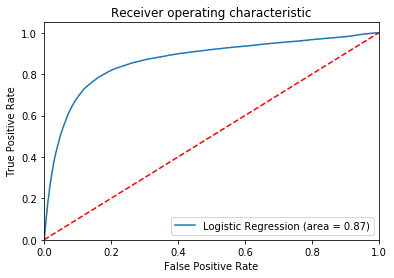

In [67]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()